In [8]:
# -------------------------------------------------------------------------
# Author:   Alberto Frizzera
# Date:     29/08/2023, info@albertofrizzera.com
# -------------------------------------------------------------------------

import os
import sys
sys.path.append(os.path.join("../../../"))

import pandas as pd
import numpy as np
import pickle
import time
from dotenv import load_dotenv
import shutil
from PIL import Image
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import gc
from sklearn.model_selection import train_test_split
import json

## Build

In [9]:
df = pd.DataFrame()
for label_path in sorted(glob.glob(os.path.join(os.environ["BENCHMARK_DATASETS"],"UCM/images/*"))):
    label = os.path.basename(label_path)
    filepaths = list(map(os.path.basename, sorted(glob.glob(os.path.join(label_path,"*")))))
    filepaths = list(map(lambda x: label + "/" + x, filepaths))
    df_tmp = pd.DataFrame({"filepath": filepaths})
    df_tmp["label"] = label.replace("_", " ")
    df = pd.concat([df, df_tmp])
df.reset_index(drop=True, inplace=True)
df.shape

(2100, 2)

In [10]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["label"])
df_train, df_val = train_test_split(df_train, test_size=0.2, stratify=df_train["label"])

print("Train samples: ",df_train.shape[0])
print("Test samples: ",df_test.shape[0])
print("Val samples: ",df_val.shape[0])

Train samples:  1344
Test samples:  420
Val samples:  336


In [11]:
df_train["split"] = "train"
df_test["split"] = "test"
df_val["split"] = "val"

df = pd.DataFrame()
df = pd.concat([df_train, df_val, df_test]).reset_index(drop=True)

In [12]:
df.head()

,filepath,label,split
0,airplane/airplane68.tif,airplane,train
1,airplane/airplane77.tif,airplane,train
2,agricultural/agricultural34.tif,agricultural,train
3,agricultural/agricultural71.tif,agricultural,train
4,chaparral/chaparral23.tif,chaparral,train


In [13]:
df.reset_index(drop=True, inplace=True)
pickle.dump(df, open(os.path.join(os.environ["BENCHMARK_DATASETS"],"UCM/labels/UCM.pkl"),"wb"))
df.to_csv(os.path.join(os.environ["BENCHMARK_DATASETS"],"UCM/labels/UCM.csv"), index=True, lineterminator='\r\n')

## Analysis

Text(0, 0.5, 'Occurrences')

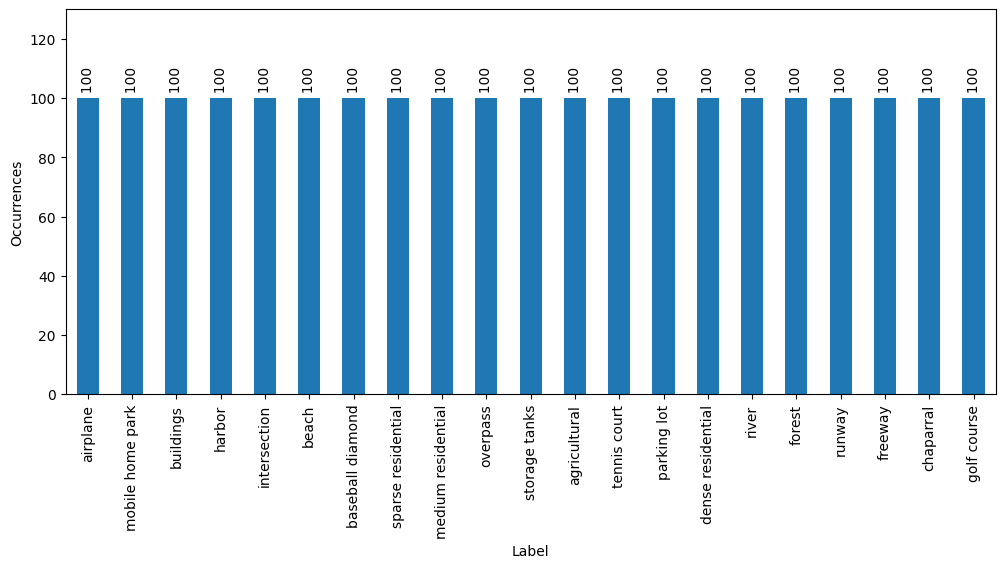

In [14]:
fig = plt.figure(figsize=(12, 5))
df["label"].value_counts().plot(kind='bar')
for index, value in enumerate(df["label"].value_counts().values):
    plt.text(index, value, "  "+str(value), rotation = 90, horizontalalignment="center")
plt.ylim([0, df["label"].value_counts()[0]+df["label"].value_counts()[0]*0.3])
plt.xlabel("Label")
plt.ylabel("Occurrences")